## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('CICIOT2023.csv')

In [3]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitude', 'Radius', 'Covariance', 'Variance', 'Weight', 'label',
       'Binary Class', 'Multiclass'],
      dtype='object')

In [4]:
df = df.drop(columns=['label', 'Binary Class'])

In [5]:
df.shape

(7332065, 47)

## Encoding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332065 entries, 0 to 7332064
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    int64  
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  int64  
 8   syn_flag_number  int64  
 9   rst_flag_number  int64  
 10  psh_flag_number  int64  
 11  ack_flag_number  int64  
 12  ece_flag_number  int64  
 13  cwr_flag_number  int64  
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             int64  
 20  HTTPS            int64  
 21  DNS              int64  
 22  Telnet           int64  
 23  SMTP             int64  
 24  SSH              int64  
 25  IRC              int64  
 26  TCP              int64  
 27  UDP         

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Multiclass'] = encoder.fit_transform(df['Multiclass'])

In [8]:
df[['Multiclass']]

,Multiclass
0,2
1,3
2,2
3,3
4,3
...,...
7332060,2
7332061,3
7332062,2
7332063,2


## Feature Importance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [10]:
x = df.drop(columns=['Multiclass'])
y = df['Multiclass']

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# Fit on training data
scaler.fit(x)
X = scaler.transform(x)

In [12]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Initialize classifiers/estimators
rf = RandomForestClassifier() #default hyperparameter
et = ExtraTreesClassifier()

In [14]:
# Fit models
rf.fit(X, y)

RandomForestClassifier()

In [15]:
et.fit(X, y)

ExtraTreesClassifier()

In [16]:
# Get feature importances from Random Forest and Extra Trees
rf_importances = rf.feature_importances_
et_importances = et.feature_importances_

### Random Forest

In [17]:
# Sort features by importance for Random Forest
sorted_indices_rf = rf_importances.argsort()[::-1]
top_25_indices_rf = sorted_indices_rf[:25]

# Get the corresponding feature names for Random Forest (replace with your actual feature names)
feature_names = x.columns
top_25_features_rf = [feature_names[i] for i in top_25_indices_rf]

# Print the top 25 feature names from Random Forest
print("Top 25 features from Random Forest:")
for feature in top_25_features_rf:
    print(feature)

Top 25 features from Random Forest:
IAT
Min
flow_duration
Tot size
AVG
Header_Length
Magnitude
Max
Protocol Type
urg_count
Srate
Tot sum
Rate
rst_count
Covariance
Variance
Weight
Number
Radius
ICMP
Std
Duration
UDP
syn_count
fin_count


In [18]:
# Create a DataFrame combining Random Forest feature names and scores
score_rf = pd.DataFrame({
    'Feature': feature_names,
    'RF Importance': rf_importances
})

#Sort the DataFrame by importance (descending order)
score_rf = score_rf.sort_values(by='RF Importance', ascending=False)

# Get the top 25 features
top_25_features_rf = score_rf.head(25)
top_25_features_rf

,Feature,RF Importance
39,IAT,0.503443
34,Min,0.060249
0,flow_duration,0.041097
38,Tot size,0.038329
36,AVG,0.034902
1,Header_Length,0.033547
41,Magnitude,0.032483
35,Max,0.025156
2,Protocol Type,0.024490
17,urg_count,0.021429


In [19]:
top_25_features_rf.shape

(25, 2)

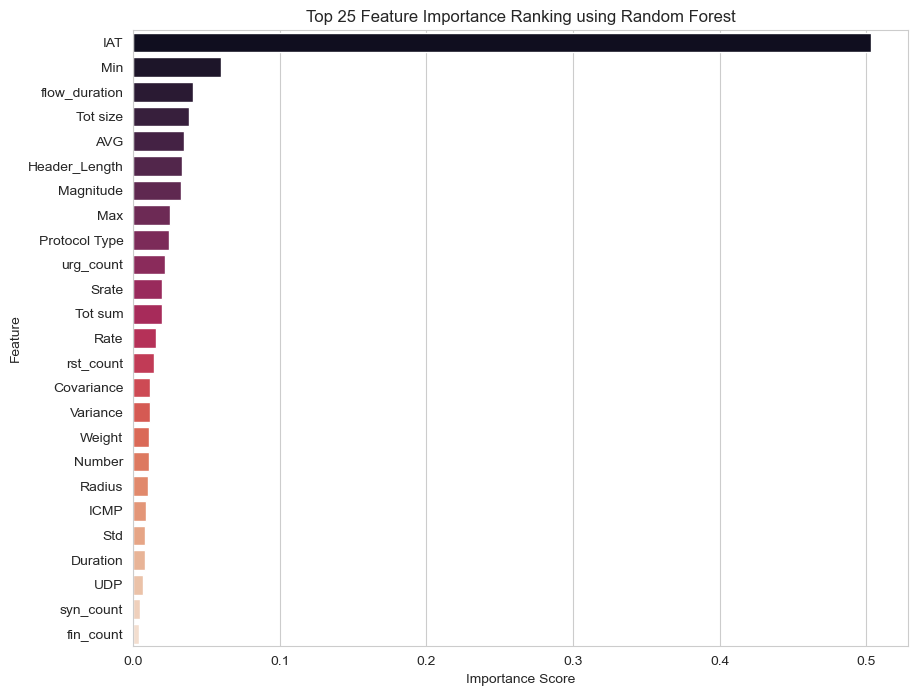

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by importance (descending order)
top_25 = top_25_features_rf.sort_values(by='RF Importance', ascending=False)

# Set up the seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='RF Importance', y='Feature', data=top_25, palette='rocket')

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importance Ranking using Random Forest')

# Show plot
plt.show()

In [21]:
# Get the remaining features that were not selected in the top 25
unselected_rf = score_rf[~score_rf['Feature'].isin(top_25_features_rf['Feature'])]

# Convert remaining features to an array
unselected_rf_array = unselected_rf['Feature'].values

# Display the array
unselected_rf_array

array(['TCP', 'ack_flag_number', 'psh_flag_number', 'HTTPS', 'ack_count',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'HTTP',
       'SSH', 'DNS', 'LLC', 'IPv', 'ARP', 'Drate', 'ece_flag_number',
       'cwr_flag_number', 'DHCP', 'IRC', 'Telnet', 'SMTP'], dtype=object)

### Extra Trees

In [22]:
# Sort features by importance for Extra Trees
sorted_indices_et = et_importances.argsort()[::-1]
top_25_indices_et = sorted_indices_et[:25]

# Get the corresponding feature names for Extra Trees (replace with your actual feature names)
top_25_features_et = [feature_names[i] for i in top_25_indices_et]

# Print the top 25 feature names from Extra Trees
print("\nTop 25 features from Extra Trees:")
for feature in top_25_features_et:
    print(feature)


Top 25 features from Extra Trees:
IAT
Protocol Type
flow_duration
Magnitude
Header_Length
ICMP
Tot sum
Variance
AVG
Min
UDP
Tot size
syn_count
Weight
TCP
ack_flag_number
Rate
Srate
psh_flag_number
Number
Max
Duration
fin_flag_number
fin_count
syn_flag_number


In [23]:
# Create a DataFrame combining Random Forest feature names and scores
score_et = pd.DataFrame({
    'Feature': feature_names,
    'ET Importance': et_importances
})

#Sort the DataFrame by importance (descending order)
score_et = score_et.sort_values(by='ET Importance', ascending=False)

# Get the top 25 features
top_25_features_et = score_et.head(25)
top_25_features_et

,Feature,ET Importance
39,IAT,0.335005
2,Protocol Type,0.073365
0,flow_duration,0.057022
41,Magnitude,0.050315
1,Header_Length,0.037562
30,ICMP,0.029167
33,Tot sum,0.028958
44,Variance,0.027898
36,AVG,0.027493
34,Min,0.027230


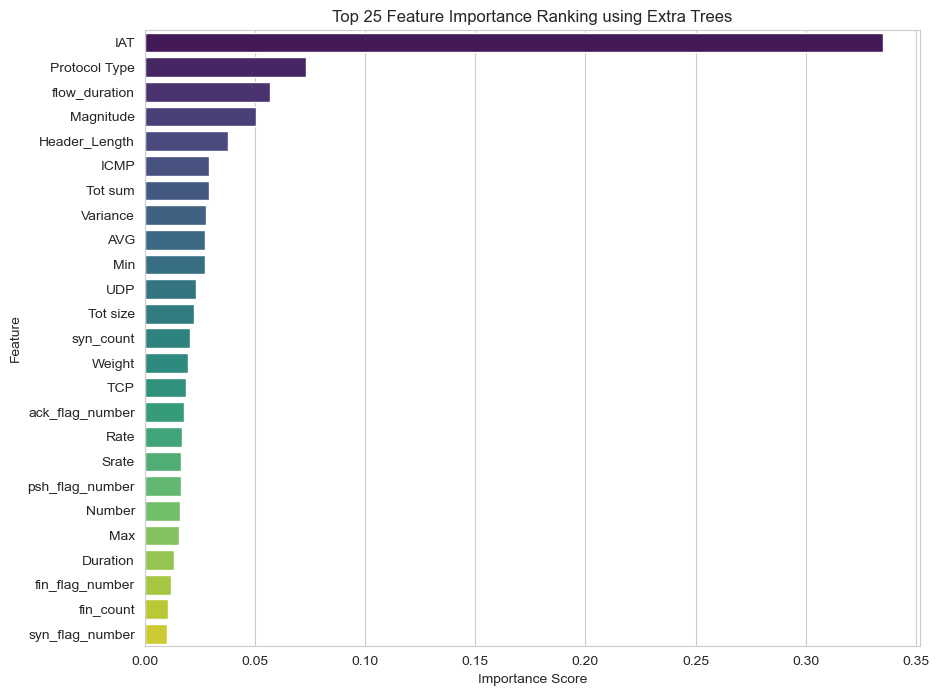

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by importance (descending order)
top_25_et = top_25_features_et.sort_values(by='ET Importance', ascending=False)

# Set up the seaborn style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='ET Importance', y='Feature', data=top_25_et, palette='viridis')

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importance Ranking using Extra Trees')

# Show plot
plt.show()


In [25]:
# Get the remaining features that were not selected in the top 25
unselected_et = score_et[~score_et['Feature'].isin(top_25_features_et['Feature'])]

# Convert remaining features to an array
unselected_et_array = unselected_et['Feature'].values

# Display the array
unselected_et_array

array(['rst_flag_number', 'rst_count', 'Radius', 'Std', 'HTTPS',
       'urg_count', 'ack_count', 'Covariance', 'HTTP', 'SSH', 'DNS',
       'LLC', 'IPv', 'ARP', 'Drate', 'ece_flag_number', 'DHCP',
       'cwr_flag_number', 'SMTP', 'IRC', 'Telnet'], dtype=object)